In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [3]:
dataset = pd.read_csv('./sports-olympics/Cost_games.csv')

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X

array([[1964, 'Japan', 'Summer', 163, 5152],
       [1972, 'Germany', 'Summer', 195, 7234],
       [1976, 'Canada', 'Summer', 198, 6048],
       [1980, 'Soviet Union', 'Summer', 203, 5179],
       [1984, 'United States', 'Summer', 221, 6829],
       [1992, 'Spain', 'Summer', 257, 9356],
       [1996, 'United States', 'Summer', 271, 10318],
       [2000, 'Australia', 'Summer', 300, 10651],
       [2004, 'Greece', 'Summer', 301, 10625],
       [2008, 'China', 'Summer', 302, 10942],
       [2012, 'United Kingdom', 'Summer', 302, 10568],
       [2016, 'Brazil', 'Summer', 306, 10500],
       [1964, 'Austria', 'Winter', 34, 1091],
       [1968, 'France', 'Winter', 35, 1158],
       [1972, 'Japan', 'Winter', 35, 1006],
       [1976, 'Austria', 'Winter', 37, 1123],
       [1980, 'United States', 'Winter', 38, 1072],
       [1988, 'Canada', 'Winter', 46, 1432],
       [1992, 'France', 'Winter', 57, 1801],
       [1994, 'Norway', 'Winter', 61, 1737],
       [1998, 'Japan', 'Winter', 68, 2176],
 

In [4]:
# Handle categorical variable - State column
labelencoder_X = LabelEncoder()
X[:,2] = labelencoder_X.fit_transform(X[:, 2])
X[:,1] = labelencoder_X.fit_transform(X[:, 1])
hotonencoder_X = OneHotEncoder(categorical_features = 'auto')
#X = hotonencoder_X.fit_transform(X).toarray()

# Avoiding the dummy trap
#X = X[:, 1:] #R&D is removed by this
X

array([[1964, 9, 0, 163, 5152],
       [1972, 6, 0, 195, 7234],
       [1976, 3, 0, 198, 6048],
       [1980, 12, 0, 203, 5179],
       [1984, 15, 0, 221, 6829],
       [1992, 13, 0, 257, 9356],
       [1996, 15, 0, 271, 10318],
       [2000, 0, 0, 300, 10651],
       [2004, 7, 0, 301, 10625],
       [2008, 4, 0, 302, 10942],
       [2012, 14, 0, 302, 10568],
       [2016, 2, 0, 306, 10500],
       [1964, 1, 1, 34, 1091],
       [1968, 5, 1, 35, 1158],
       [1972, 9, 1, 35, 1006],
       [1976, 1, 1, 37, 1123],
       [1980, 15, 1, 38, 1072],
       [1988, 3, 1, 46, 1432],
       [1992, 5, 1, 57, 1801],
       [1994, 10, 1, 61, 1737],
       [1998, 9, 1, 68, 2176],
       [2002, 15, 1, 78, 2399],
       [2006, 8, 1, 84, 2508],
       [2010, 3, 1, 86, 2566],
       [2014, 11, 1, 98, 2780]], dtype=object)

In [5]:
# We are going to keep 20% of the dataset in test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression

multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

# y_pred contains all the values predicted by trained model
y_pred = multiple_linear_regressor.predict(X_test)

In [7]:
X_test

array([[1992, 13, 0, 257, 9356],
       [1976, 3, 0, 198, 6048],
       [1994, 10, 1, 61, 1737],
       [1980, 15, 1, 38, 1072],
       [2016, 2, 0, 306, 10500]], dtype=object)

In [8]:
y_test

array([9.687, 6.093, 2.228, 0.435, 4.557])

In [9]:
y_pred

array([4.57260291, 1.243284  , 4.91606749, 2.9960556 , 8.55319066])

In [10]:
multiple_linear_regressor.predict([[2020, 9, 0, 321 , 10616]])

array([11.88469952])

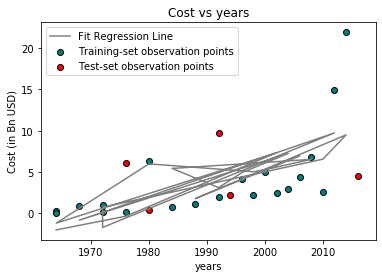

In [11]:
plt.scatter(X_train[:,0], y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train[:,0], multiple_linear_regressor.predict(X_train), color='grey', label='Fit Regression Line')
plt.title('Cost vs years')
plt.xlabel('years')
plt.ylabel('Cost (in Bn USD)')

plt.scatter(X_test[:,0], y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

# Single feature linear regression

In [24]:
# Create model objects
lr_years = LinearRegression()
lr_events = LinearRegression()
lr_athletes = LinearRegression()

# Separate data and make them column vectors
X_years = X[:,0].reshape(-1, 1)
X_events = X[:,3].reshape(-1, 1)
X_athletes = X[:,4].reshape(-1, 1)

In [17]:
# Keep 20% of the dataset in test dataset
# 80% is used as the training set
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(X_years, y, test_size=1/5, random_state=0)
lr_years.fit(X_train_years, y_train_years)

X_train_events, X_test_events, y_train_events, y_test_events = train_test_split(X_events, y, test_size=1/5, random_state=0)
lr_events.fit(X_train_events, y_train_events)

X_train_athletes, X_test_athletes, y_train_athletes, y_test_athletes = train_test_split(X_athletes, y, test_size=1/5, random_state=0)
lr_athletes.fit(X_train_athletes, y_train_athletes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Create lists with many data points to test the models.
# This is not really necessary for linear models since a line can be made with only two points
# but is useful for polynomial models.
X_lst_years = np.arange(1964, 2014).reshape(-1, 1)
X_lst_events = np.arange(34, 302).reshape(-1, 1)
X_lst_athletes = np.arange(1432, 10942).reshape(-1, 1)

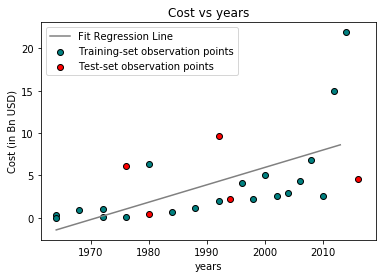

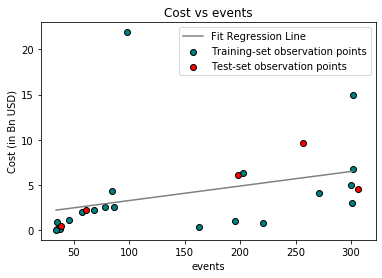

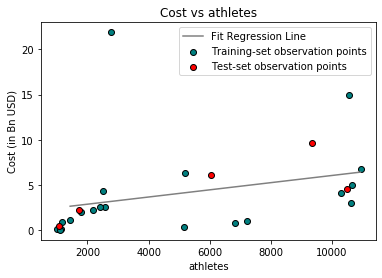

In [19]:
# Plot results
plt.figure(1)
plt.scatter(X_train_years, y_train_years,
            color='teal', edgecolors='black', label='Training-set observation points')
plt.scatter(X_test_years, y_test_years.reshape(-1, 1),
            color='red', edgecolors='black', label='Test-set observation points')
plt.plot(X_lst_years, lr_years.predict(X_lst_years).reshape(-1, 1),
         color='grey', label='Fit Regression Line')
plt.title('Cost vs years')
plt.xlabel('years')
plt.ylabel('Cost (in Bn USD)')
plt.legend()

plt.figure(2)
plt.scatter(X_train_events, y_train_events,
            color='teal', edgecolors='black', label='Training-set observation points')
plt.scatter(X_test_events, y_test_events.reshape(-1, 1),
            color='red', edgecolors='black', label='Test-set observation points')
plt.plot(X_lst_events, lr_events.predict(X_lst_events).reshape(-1, 1),
         color='grey', label='Fit Regression Line')
plt.title('Cost vs events')
plt.xlabel('events')
plt.ylabel('Cost (in Bn USD)')
plt.legend()

plt.figure(3)
plt.scatter(X_train_athletes, y_train_athletes,
            color='teal', edgecolors='black', label='Training-set observation points')
plt.scatter(X_test_athletes, y_test_athletes.reshape(-1, 1),
            color='red', edgecolors='black', label='Test-set observation points')
plt.plot(X_lst_athletes, lr_athletes.predict(X_lst_athletes).reshape(-1, 1),
         color='grey', label='Fit Regression Line')
plt.title('Cost vs athletes')
plt.xlabel('athletes')
plt.ylabel('Cost (in Bn USD)')
plt.legend()

plt.show()